PART 1:


HOW TO CLEAN DATA WITH PYTHON
Cleaning US Census Data

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import glob
path = r'/content/all_files'
all_files = glob.glob(path+"/*.csv")
li = []
for filename in all_files:
  df = pd.read_csv(filename, index_col=None, header=0)
  li.append(df)
us_census = pd.concat(li, axis=0, ignore_index=True) 
us_census.head(10) 

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F
5,5,Wisconsin,5742117,6.683333333333334%,79.86400862068966%,8.195186781609202%,0.9536637931034483%,2.404238505747124%,0.020833333333333332%,$53898.889208633096,2851385M_2890732F
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


In [25]:
us_census.dtypes
us_census.drop(columns = ['Unnamed: 0'], inplace=True)
us_census[['Male','Female']] = us_census.GenderPop.str.split("_", expand = True)
us_census.drop(columns = ['GenderPop'], inplace = True)
us_census['Income'] = us_census.Income.str.strip('$')
us_census = us_census.replace('%','', regex = True)
us_census = us_census.replace('F','', regex = True)
us_census = us_census.replace('M','', regex = True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Utah,2903379,13.468376068376063,79.40683760683764,1.0179487179487194,1.0813675213675222,2.196068376068376,0.8259829059829059,63488.91780821918,1459229,1444150
1,Vermont,626604,1.6092896174863391,93.98306010928961,0.9808743169398909,0.301639344262295,1.2387978142076501,0.03060109289617486,55602.96721311475,308573,318031
2,Virginia,8256630,8.0110164981373,63.271048430015945,20.17599787120807,0.21245343267695582,5.455242150079845,0.06471527408195847,72866.01341201717,4060948,4195682
3,Washington,6985464,11.140968858131506,72.03840830449816,3.384429065743947,1.4107266435986163,7.022006920415224,0.609896193771627,64493.76768377254,3487725,3497739
4,West Virginia,1851420,1.290909090909089,92.17623966942146,3.6628099173553723,0.15268595041322316,0.6824380165289253,0.02644628099173554,41437.11157024794,913631,937789


In [26]:
us_census.loc[:,'Hispanic':'Income'] = round(us_census.loc[:,'Hispanic':'Income'].apply(pd.to_numeric),2)

In [27]:
us_census['Male'] = us_census['Male'].astype(int)
us_census['Female'] = us_census['TotalPop']-us_census['Male'] 
us_census.duplicated().any()
us_census.drop_duplicates(inplace = True)

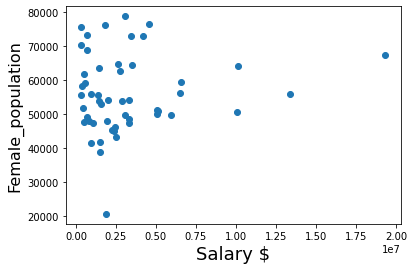

In [28]:
import matplotlib.pyplot as plt
plt.scatter(us_census['Female'], us_census['Income'])
plt.xlabel('Salary $', fontsize = 18)
plt.ylabel('Female_population', fontsize = 16)
plt.show()

In [29]:
histo = round(us_census.loc[:,'Hispanic':'Pacific'].apply(lambda x:x*us_census['TotalPop']/100))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ebb703f50>]],
      dtype=object)

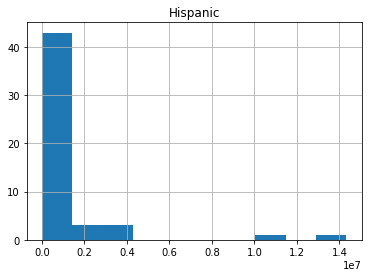

In [30]:
histo.hist(column = 'Hispanic')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ebb69f210>]],
      dtype=object)

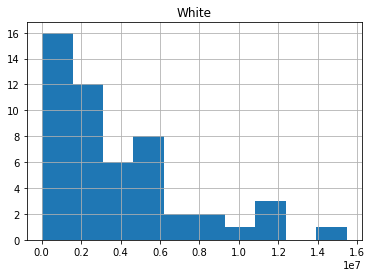

In [31]:
histo.hist(column = 'White')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ebb681250>]],
      dtype=object)

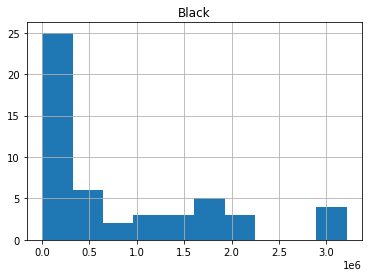

In [32]:
histo.hist(column = 'Black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ebb554fd0>]],
      dtype=object)

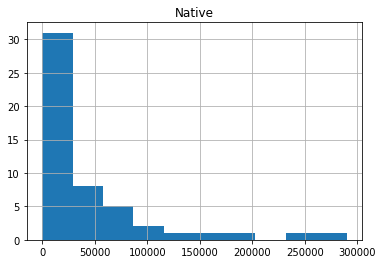

In [33]:
histo.hist(column = 'Native')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ebb4d5ed0>]],
      dtype=object)

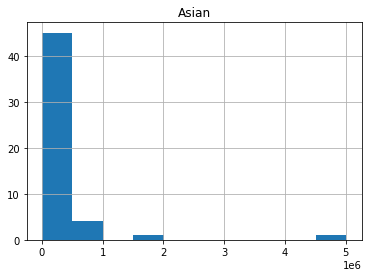

In [34]:
histo.hist(column = 'Asian')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ebb457690>]],
      dtype=object)

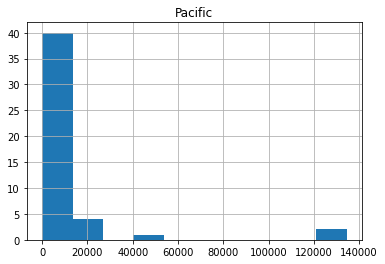

In [35]:
histo.hist(column = 'Pacific')

PART 2:

LEARN DATA ANALYSIS WITH PANDAS
Petal Power Inventory

In [11]:
inventory = pd.read_csv('/content/inventory.csv')
inventory

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [12]:
product_request = inventory[inventory['location'] == "Staten Island"]
product_request

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [15]:
seed_request = inventory[(inventory["location"] == "Brooklyn") & (inventory["product_type"] == "seeds")]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [18]:
inventory["In_stock"] = inventory["quantity"] > 0
inventory

,location,product_type,product_description,quantity,price,In_stock,Total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [19]:
inventory["Total_value"] = inventory["price"] * inventory["quantity"]
inventory

,location,product_type,product_description,quantity,price,In_stock,Total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [21]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type,row.product_description)

In [23]:
inventory["full_description"] = inventory.apply(combine_lambda, axis = 1)
inventory["full_description"]

0                            seeds - daisy
1                       seeds - calla lily
2                           seeds - tomato
3                      garden tools - rake
4               garden tools - wheelbarrow
5                     garden tools - spade
6             pest_control - insect killer
7               pest_control - weed killer
8     planter - 20 inch terracotta planter
9         planter - 8 inch plastic planter
10                           seeds - daisy
11                      seeds - calla lily
12                          seeds - tomato
13                     garden tools - rake
14              garden tools - wheelbarrow
15                    garden tools - spade
16            pest_control - insect killer
17              pest_control - weed killer
18    planter - 20 inch terracotta planter
19        planter - 8 inch plastic planter
20                           seeds - daisy
21                      seeds - calla lily
22                          seeds - tomato
23         